In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

$\textbf{PART I}$

In [2]:
my_data = np.loadtxt('lecture_data_1.txt')
correct_data  = np.loadtxt('x_positions_used_in_lecture.txt')
nNumbers = my_data.size

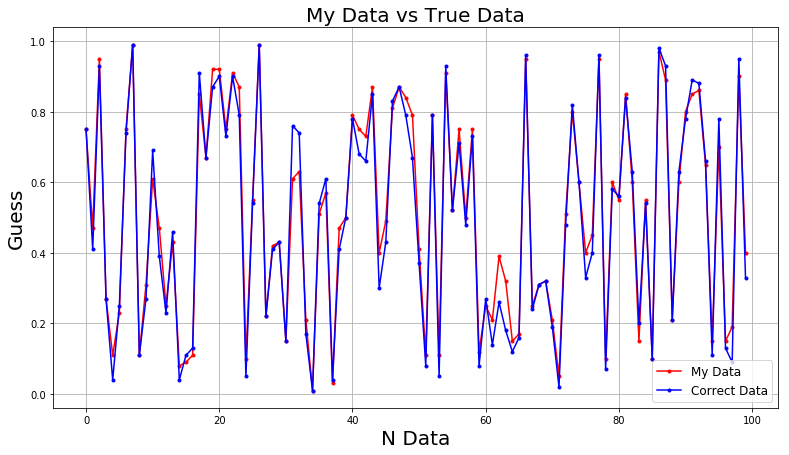

In [3]:
plt.figure(figsize=(13,7))
plt.plot(my_data,'r.-')
plt.plot(correct_data,'b.-')
plt.legend(['My Data','Correct Data'], fontsize=12)
plt.grid(True)
plt.title('My Data vs True Data',fontsize=20)
plt.xlabel('N Data',fontsize=20)
plt.ylabel('Guess', fontsize=20)
plt.show()

In [4]:
my_diff = my_data - correct_data

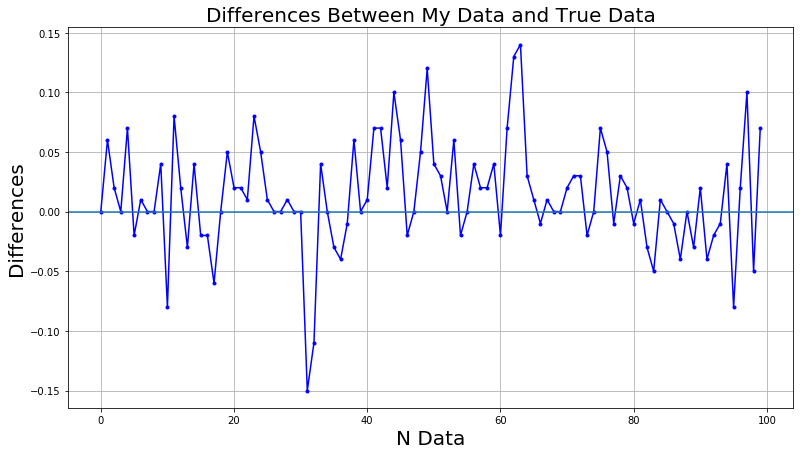

Most positive deviation: 0.14
MOst negative deviation: -0.15000000000000002
The extreme descrepencies are likely caused by human error.


In [5]:
plt.figure(figsize=(13,7))
plt.plot(my_diff,'b.-')
plt.axhline()
plt.title('Differences Between My Data and True Data',fontsize=20)
plt.xlabel('N Data',fontsize=20)
plt.ylabel('Differences',fontsize=20)
plt.grid(True)
plt.show()
print('Most positive deviation:',my_diff.max())
print('MOst negative deviation:',my_diff.min())
print('The extreme descrepencies are likely caused by human error.')

In [6]:
avg = np.average(my_diff)
print('Average Differences:', avg)
print('The average is positive means that I overestimate most of the data')

Average Differences: 0.013099999999999999
The average is positive means that I overestimate most of the data


In [7]:
my_std = np.std(my_diff)
print('Standard Deviation of my Diff:', my_std)
my_var = my_std**2
print('Variance of my Diff:',my_var)

Standard Deviation of my Diff: 0.04577543009082493
Variance of my Diff: 0.0020953900000000004


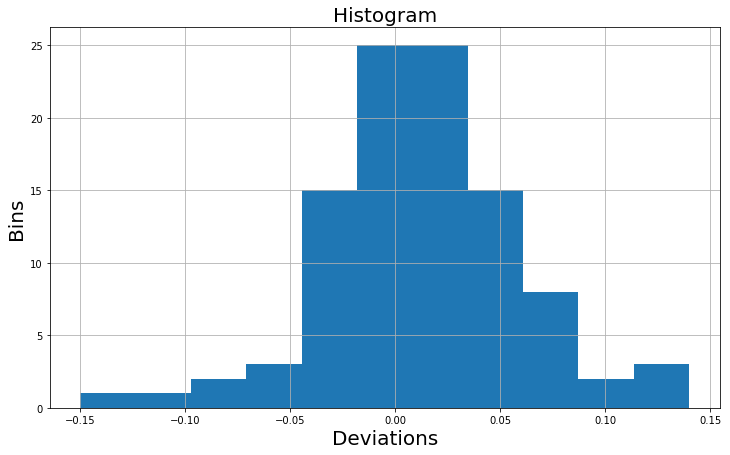

In [8]:
plt.figure(figsize=(12,7))
plt.hist(my_diff,11)
plt.title('Histogram',fontsize=20)
plt.ylabel('Bins',fontsize=20)
plt.xlabel('Deviations',fontsize=20)
plt.grid(True)
plt.show()

$\textbf{PART II}$

In [9]:
import glob

In [10]:
datas = glob.glob('txt_files_09-04-18_9am\*.txt')

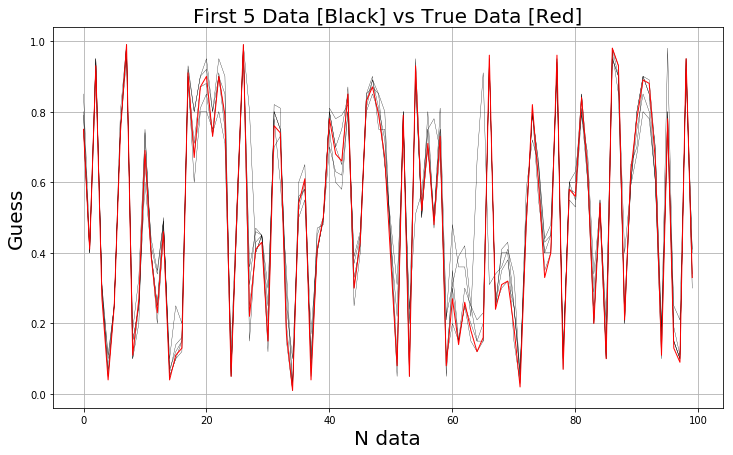

In [11]:
plt.figure(figsize=(12,7))
for i in range(5):
    data = np.loadtxt(datas[i])
    plt.plot(data,color="black",linewidth=0.3)

plt.title('First 5 Data [Black] vs True Data [Red]',fontsize=20)
plt.ylabel('Guess',fontsize=20)
plt.xlabel('N data',fontsize=20)
plt.plot(correct_data,'r-',linewidth=1)
plt.grid(True)
plt.show()

In [12]:
std = np.array([])
var = np.array([])
diff = np.array([])
data_x = np.array([])
for i in range(len(datas)):
    data = np.loadtxt(datas[i])
    data_x = np.append(data_x, data)
    each_diff = data - correct_data
    each_std = np.std(each_diff)
    each_var = (each_std)**2
    var = np.append(var,each_var)
    std = np.append(std,each_std)
    diff = np.append(diff,each_diff)


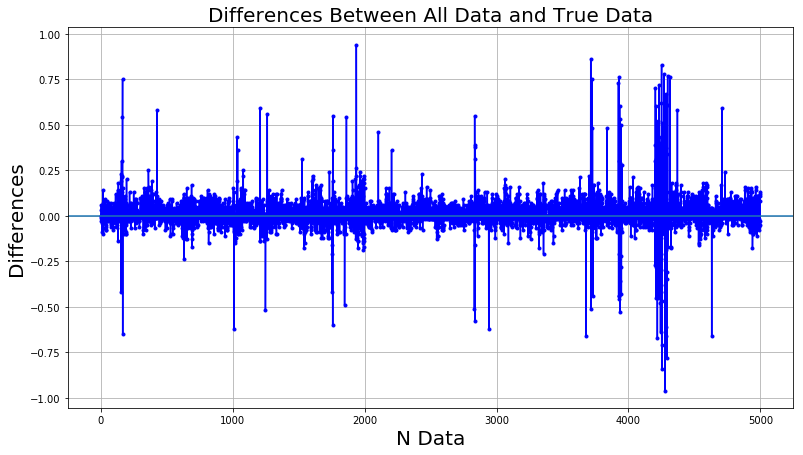

Most positive deviation: 0.94
MOst negative deviation: -0.96
Again, the extreme descrepencies are likely caused by human error, but some could be caused by random guessing, that is a particular data set are generated without actual attempt at guessing the values


In [13]:
plt.figure(figsize=(13,7))
plt.plot(diff,'b.-')
plt.axhline()
plt.title('Differences Between All Data and True Data',fontsize=20)
plt.xlabel('N Data',fontsize=20)
plt.ylabel('Differences',fontsize=20)
plt.grid(True)
plt.show()
print('Most positive deviation:',diff.max())
print('MOst negative deviation:',diff.min())
print('Again, the extreme descrepencies are likely caused by human error, but some could be caused by random guessing, that is a particular data set are generated without actual attempt at guessing the values')

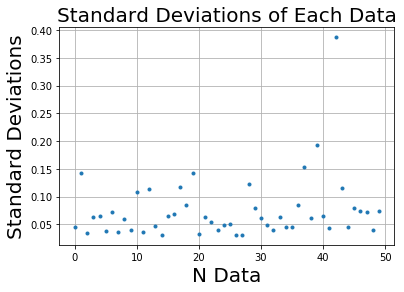

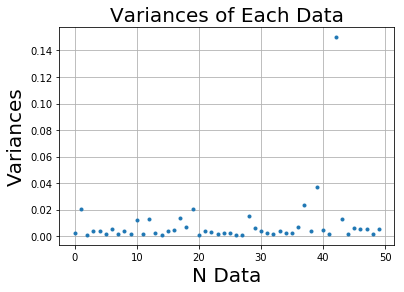

txt_files_09-04-18_9am\5193580.txt  has the smallest variance
txt_files_09-04-18_9am\5446439.txt  has the largest variance
My data set ranked number 17


In [14]:
sort_std = np.sort(std)
sort_var = np.sort(var)
plt.plot(std,'.')
plt.title('Standard Deviations of Each Data',fontsize=20)
plt.xlabel('N Data',fontsize=20)
plt.ylabel('Standard Deviations',fontsize=20)
plt.grid(True)
plt.show()


plt.plot(var,'.')
plt.title('Variances of Each Data',fontsize=20)
plt.xlabel('N Data',fontsize=20)
plt.ylabel('Variances',fontsize=20)
plt.grid(True)
plt.show()

    
for i in range(var.size):
    if var[i] == var.max():
        print(datas[i],' has the largest variance')
    if var[i] == var.min():
        print(datas[i],' has the smallest variance')
        
for i in range(len(datas)):
    if sort_var[i] == my_var:
        print('My data set ranked number',i+1)

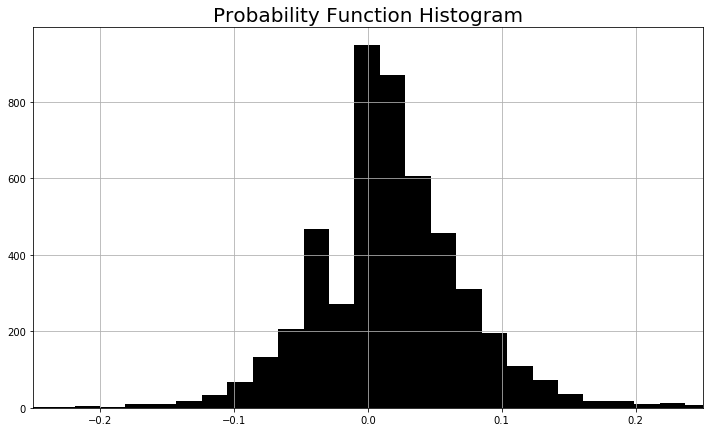

In [15]:
plt.figure(figsize=(12,7))
plt.hist(diff,100,color='black')
plt.xlim(-.25,.25)
plt.grid(True)
plt.title('Probability Function Histogram',fontsize=20)
plt.show()

diff_std = np.std(diff)
diff_vars = diff_std**2

In [16]:
print('Standard Deviation of Diff:', diff_std)
print('Variance of Diff:',diff_vars)

Standard Deviation of Diff: 0.09496310660461778
Variance of Diff: 0.009017991616


In [17]:
x = np.arange(-.25,.25,0.01)
a = np.mean(diff)
gaus = (1/np.sqrt(2*np.pi*diff_vars))*np.exp((-(x-a)**2)/(2*diff_vars))

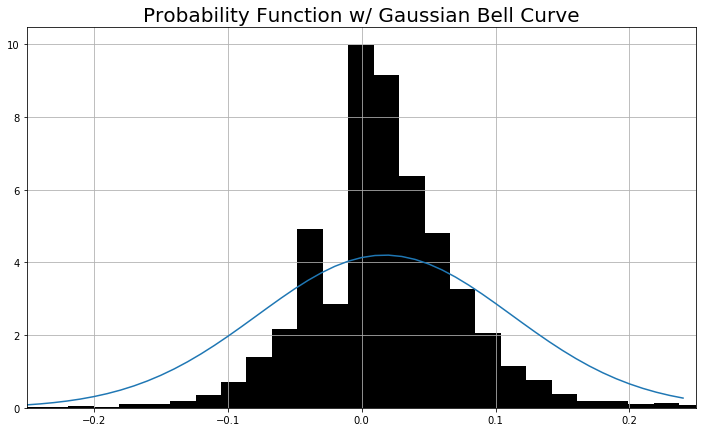

In [18]:
plt.figure(figsize=(12,7))
plt.hist(diff,100, density=True,color='black')
plt.xlim(-.25,.25)
plt.plot(x,gaus)
plt.title('Probability Function w/ Gaussian Bell Curve',fontsize=20)
plt.grid(True)
plt.show()

$\textbf{PART III}$

In [19]:
matrix = np.array([])
for i in range(len(datas)):
    data = np.loadtxt(datas[i])
    mean_x = np.mean(data)
    if i == 0:
        matrix = np.append(matrix,data)
    if i > 0:
        matrix = np.vstack((matrix,data))
mean_cols = np.array([])
std_cols = np.array([])
uncer_cols = np.array([])

exact_values = np.array([])
within_limits= np.array([])


for i in range(100):
    col = np.array([])
    for j in range(50):
        col = np.append(col,matrix[j][i])
        
    mean_col = np.mean(col)
    mean_std = np.std(col)
    uncer = mean_std/np.sqrt(50)
    mean_cols =np.append(mean_cols,mean_col)
    std_cols =np.append(std_cols,mean_std)
    uncer_cols = np.append(uncer_cols,uncer)
    
    upper_lim = mean_cols[i] + uncer_cols[i]
    lower_lim = mean_cols[i] - uncer_cols[i]
    
    for k in range(50):
        if col[k] < upper_lim and col[k] > lower_lim:
            within_limits = np.append(within_limits,col[k])
            if col[k] == correct_data[i]:
                exact_values = np.append(exact_values,col[k])
        
print('A total of', within_limits.size, 'x-positions falls within the <x> +/- uncertainty interval;')
print('and within that interval, a total of', exact_values.size, 'x-positions have the exact solution to the correct data')

A total of 938 x-positions falls within the <x> +/- uncertainty interval;
and within that interval, a total of 78 x-positions have the exact solution to the correct data
